# Mike Nebesniuk - Capstone Project

# With machine learning, can we determine if a photograph is capable of winning a photography contest.

### mike.nebesniuk@gmail.com

For my CapStone project for BrainStation I have chosen to investigate whether it is posible to use machine learning to determine if a photography is capable of winning a photography contest or not. 

As a part-time professional photographer I have always found it confusing when I saw what people considered to be award winning photographs. I would see blurry photos that people raved about, I would see amazing photos that people ignored. So I decided to take winning photographs from many landscape contests and compare them to the photos from that same contest that did not win. In order to accomplish this I plan to take the top 100-200 from each contest (These contests often have 30,000 images so the top 100-200 are the top of the top images. I will then get the lowest rated photos I can to compare these images too.

In order to compare the images I get, I plan to get between 3000-5000 of each type of photo. I will then use Convoluted Neural Networks (CNN's) to compare the images I find. Once I have made the model I will Introduce new photos that are clearly good or bad photos to see how they fit into the model.

## In this notebook

In this notebook you will find web scraping attempts, and the EDA process.

## Import Functions

In [2]:
# Standard imports
import numpy as np
import pandas as pd

# Tools For web scraping
import requests
from bs4 import BeautifulSoup

from bs4 import BeautifulSoup
import requests


# Tools For performing regex operations
import re

# For adding delays
import time

# WebScraping

Web scraping is a term used to describe the use of a program or algorithm to extract and process large amounts of data from the web. Whether you are a data scientist, engineer, or anybody who analyzes large amounts of datasets, the ability to scrape data from the web is a useful skill to have. Let's say you find data from the web, and there is no direct way to download it, web scraping using Python is a skill you can use to extract the data into a useful form that can be imported. Taken From <a href="https://www.datacamp.com/community/tutorials/web-scraping-using-python">Link</a><br/>

In [24]:
# Send a get request and assign the response to a variable
response = requests.get(url)

**Variables above**

   * Requests.Get - This contains the GET variables. This is what you see in your browsers address bar.

In [25]:
# Prints the result of the request above
response

<Response [200]>

A responce of 200 is a standard reply with a successful connection to a website, 404 is an example of a poor connection to a website, this is a number we probably see more often, but 200 is goo.

In [26]:
# This will display the content of the website so we can read the code easier.
response.content

b'<!DOCTYPE HTML><html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en" class="os-unknown no-js">\r\n\t<head >\r\n    <script type="text/javascript">\r\n    var _iub = _iub || [];\r\n    _iub.csConfiguration = {"ccpaApplies":true, "enableCcpa":true, "gdprAppliesGlobally":false,"countryDetection":true,"consentOnContinuedBrowsing":false,"perPurposeConsent":true,"whitelabel":false,"lang":"en","siteId":2098195,"cookiePolicyId":86036520,"cookiePolicyUrl":"https://www.viewbug.com/cookie-policy", "banner":{ "acceptButtonDisplay":true,"customizeButtonDisplay":true,"acceptButtonColor":"#828282","acceptButtonCaptionColor":"white","customizeButtonColor":"#212121","customizeButtonCaptionColor":"white","rejectButtonDisplay":true,"rejectButtonColor":"#818385","rejectButtonCaptionColor":"white","position":"float-bottom-left","textColor":"white","backgroundColor":"#000001" }};\r\n    </script>\r\n    <script type="text/javascript" src="//cdn.iubenda.com/cs/iubenda_cs.js" charset="UTF-8" as

Above we can see the base HTML code from the website, unless you can understand the code here it is very hard to understand. It can help you navigate the site a bit and figure out how they have designed the website, and in this case how they have the photos stored on the website. This code looks like it is a little difficult to read, let us try beautiful soup instead.

In [27]:
# Now we will turn the undecoded content into a Beautiful Soup object and assign it to a variable
soup = BeautifulSoup(response.content)

Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML,[2] which is useful for web scraping.[1]

Beautiful Soup was started by Leonard Richardson, who continues to contribute to the project,[3] and is additionally supported by Tidelift, a paid subscription to open-source maintenance

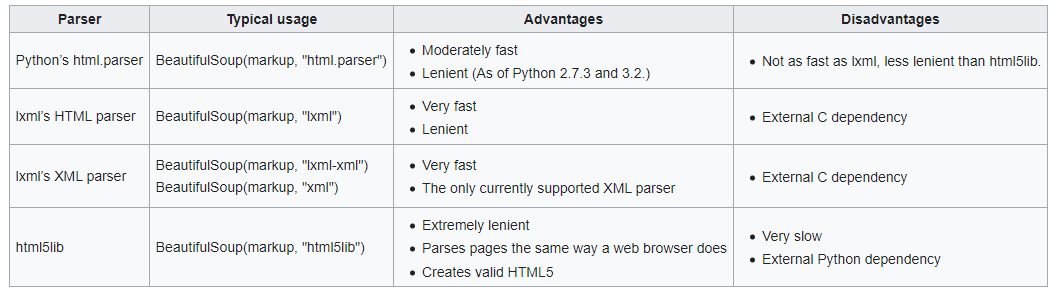

Taken From <a href="https://en.wikipedia.org/wiki/Beautiful_Soup_(HTML_parser)">Link</a><br/>

In [28]:
# This will display the results from the beautiful soup
soup

<!DOCTYPE HTML>
<html class="os-unknown no-js" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<script type="text/javascript">
    var _iub = _iub || [];
    _iub.csConfiguration = {"ccpaApplies":true, "enableCcpa":true, "gdprAppliesGlobally":false,"countryDetection":true,"consentOnContinuedBrowsing":false,"perPurposeConsent":true,"whitelabel":false,"lang":"en","siteId":2098195,"cookiePolicyId":86036520,"cookiePolicyUrl":"https://www.viewbug.com/cookie-policy", "banner":{ "acceptButtonDisplay":true,"customizeButtonDisplay":true,"acceptButtonColor":"#828282","acceptButtonCaptionColor":"white","customizeButtonColor":"#212121","customizeButtonCaptionColor":"white","rejectButtonDisplay":true,"rejectButtonColor":"#818385","rejectButtonCaptionColor":"white","position":"float-bottom-left","textColor":"white","backgroundColor":"#000001" }};
    </script>
<script async="" charset="UTF-8" src="//cdn.iubenda.com/cs/iubenda_cs.js" type="text/javascript"></script>
<!-- Force la

Now this is a lot easier to read. Now from experience with the site, this is what the filenames are:

<div style="display:none">ids: 58333717,65436440,45095571,59986845,58387887,35134991,54843381,46282001,66758067,64994538,66363122,64459849,55626811,66878610,66170224,66881378,66878350,66782441,66705444,66881768,52194441,64450611,60629787,58882107,61320269,4479481,56786702,60993993,55799463,63167845,60036759,65740289,37487901,66662278,</div> </section>

We can try to scrape them off below. But this is a very clumbsy way to do this we think.

In [14]:
# This will describe what type of soup we have
type(soup)

bs4.BeautifulSoup

BS4 = Beautiful soup 4

In [29]:
# Now we will look for 'div' in the class of 'image' on the website we ran through beautiful soup
soup.find('div', class_='image')

**Variables from above**<br/>
soup.find - This will find variables in the html code of the website
div - HTML code to define a division in the code
image - HTML code for an image
Class - HTML code for defining an object


In [31]:
# This will save the previous data to a variable and print the results
winners = soup.find('div', class_='image')
print(winners)

None


This method is not working, let us try something else. I think this section is setup incorrectly, but I have some other options I can try below.

In [32]:
url = 'https://www.viewbug.com/contests/my-incredible-landscape-photo-contest/ranks#_=_'
# get contents from url
content = requests.get(url).content
# get soup
soup = BeautifulSoup(content,'lxml') # choose lxml parser
# find the tag : <img ... >
image_tags = soup.findAll('img')
# print out image urls
for image_tag in image_tags:
    print(image_tag.get('src'))

https://www.facebook.com/tr?id=917533844982402&ev=PageView&noscript=1
https://ct.pinterest.com/v3/?event=init&tid=2613155678160&pd[em]=<hashed_email_address>&noscript=1
/media/images/layout/vb_logo_white.svg
/media/images/layout/vb_logo.svg
/vb2/public/media/images/layout/the_lines.svg
/vb2/public/media/images/layout/logo_big.png?ver=3
/media/images/layout/frontpage/fb_button2.png?v=1
//googleads.g.doubleclick.net/pagead/viewthroughconversion/1057971493/?value=0&guid=ON&script=0


While this is getting images, they are not the images I want from the site. This site loads slowly, and I am thinking this method of getting data is not going to work. There are up to 30,000+ images on this page, but you have to wait for it to scroll for days in order to see them all. We will try a few more options below with other pages on this site.

In [34]:
url2 = 'https://www.viewbug.com/blog/the-shape-of-clouds-photo-contest-winner'
# get contents from url
content = requests.get(url2).content
# get soup
soup = BeautifulSoup(content,'lxml') # choose lxml parser
# find the tag : <...img ... >
image_tags = soup.findAll('img')
# print out image urls
for image_tag in image_tags:
    print(image_tag.get('src'))

https://www.facebook.com/tr?id=917533844982402&ev=PageView&noscript=1
https://ct.pinterest.com/v3/?event=init&tid=2613155678160&pd[em]=<hashed_email_address>&noscript=1
/media/images/layout/vb_logo_white.svg
/media/images/layout/vb_logo.svg
/vb2/public/media/images/layout/the_lines.svg
/vb2/public/media/images/layout/logo_big.png?ver=3
https://www.viewbug.com/media/mediafiles/2020/09/11/90913843_large1300.jpg
https://www.viewbug.com/media/mediafiles/2020/09/11/90913843_medium.jpg
https://www.viewbug.com/media/mediafiles/2016/11/29/69995949_medium.jpg
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
/media/images/layout/app_store.png?v=3
/media/images/layout/play_store.png
//googleads.g.doubleclick.net/pagead/viewthroughconversion/1057971493/?value=0&guid=ON&script=0


In [22]:
url3 = 'https://www.viewbug.com/blog/500-stormy-clouds-photo-contest-finalists'
# get contents from url
content = requests.get(url3).content
# get soup
soup = BeautifulSoup(content,'lxml') # choose lxml parser
# find the tag : <...img ... >
image_tags = soup.findAll('img')
# print out image urls
for image_tag in image_tags:
    print(image_tag.get('src'))

https://www.facebook.com/tr?id=917533844982402&ev=PageView&noscript=1
https://ct.pinterest.com/v3/?event=init&tid=2613155678160&pd[em]=<hashed_email_address>&noscript=1
/media/images/layout/vb_logo_white.svg
/media/images/layout/vb_logo.svg
/vb2/public/media/images/layout/the_lines.svg
/vb2/public/media/images/layout/logo_big.png?ver=3
https://www.viewbug.com/media/mediafiles/2015/09/07/58333717_large1300.jpg
https://www.viewbug.com/media/mediafiles/2015/09/07/58333717_medium.jpg
https://www.viewbug.com/media/mediafiles/2016/04/15/65436440_medium.jpg
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
https://www.viewbug.com/media/mediafiles/2015/05/10/54978299_medium.jpg
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
/media/images/layout/white_transparent.png
https://www.viewbug.com/med

**Conclusions** <br/>
Now this page works, but that was a lot of work for 5 images, and I would still have to download them individually. We can see where this type of web scraping could be very useful, but for the images on this website, it is a very slow and clumsy method for downloading many files. We have looked at how this site is setup, and it loads images, maybe 8 at a time, you can view those images, but to see more you have to scroll down to see the next at. It will load maybe 30 at a time, but as you scroll down you have to wait for those 30 to fully load before you can load the next 30. This runs smoothly until you get to the first 1000 images and then it starts to take longer for 30 images to load. Once you get past 2000 it firefox web-browser starts telling you the website has slowed down your page, and asks if you would like to wait. It is at this point scrolling through photos become very slow. This is about where you would want to run the web scraper, but when you do from Python it starts the page over again at the top. When I copied the link over I had got down to about the 1500th photo, but when I used the web scraping tool it only scraped the into page, none of the photos I have opened up. This is why I began trying other websites in the viewbug site, ones where it just shows the top 6 winners or so. This worked better I was able to see the first 6 or so, but downloading them was still an issue. The website I am able to unlock when I view how I did in a contest (the first one I looked at) still seems to be the best resource for getting photos because in time, it will show me all 30,000+ images. I am going to start searching the internet for alternatives for downloading the images.

# Browser Based Web Scraping

## FoxyImage Plugin for FireFox Web Browser

**FoxyImage** is a tiny multi-process extension that adds a number of Image related actions to the Context Menu.
Let me know if you want other functions added.

Note: None of my extensions contain any tracking, advertising or privacy infringement.

**Features**

   * Multi Process Compatible
   * Works on any site or local files opened by the browser
   * (Firefox restricts some functions on some URLs.)
   * Removes duplicate URLs
   * Option to filter downloads (v1.3)
   * Import/Export Preferences (v1.4)
   * Container Support: New Tab will be opened in the same container (v1.5) (requires cookie permission)


**Actions**

   * Rotate Left/Right & 180° (v1.5)
   * Flip Vertical/Horizontal
   * Reset
   * Open Image in New Tab
   * Copy Image as Data:URI (requires clipboardWrite permission) (v1.5)
   * Save All Images (v1.1)
   * Save Selected Images (v1.1)
   * Open Selected Images in New Tabs (v1.1)
   * Save All Image Links (v1.1)
   * Save Selected Image Links (v1.1)
   * Open Selected Image links in New Tabs (v1.1)
   * Save All Target Images (from a link) (v1.1)
   * Save All Target Image Links (from a link) (v1.1)
   * Save Images from Tabs Left/Right (v1.5)
   * Save Image Links from Tabs Left/Right (v1.5)
   * Reload Image/All Images (v1.7)


**Permissions Explanation:**
   * Access your data for all websites: 
   * Used to get remote ImagesInput data to the clipboard: Used to Copy to Clipboard (v1.5)
   * Download files and read and modify the browser’s download history: Used to download images only
   * Display notifications to you: Used to inform users
   
   Taken From <a href="https://addons.mozilla.org/en-CA/firefox/addon/foxyimage/">Link</a><br/>

After a fairly long search online we found this FireFox addon called FoxyImages. It allows you to download all the visible images on a screen at once time. From this we can go to the pages of viewbug and download all the images. Since we have a membership to viewbug, and entered several photo contests in the past and recently, we have links to all those contest's result's pages where they list all the contestants from winners to last place, each of these contests can have up to almost 40,000 images. This should be an endless supply of data for us.

First thoughts after downloading a few photos, This may be a very slow process, the website throttles you after about 1000 images. Since FoxyImage needs the images to be displayed on the screen to download them, and because the contest results page only displays maybe 20 images at a time, you have to scroll through countless pages of images to get to enough to use for the project. Also, since you can only download all the images at once, say first place to 500th place, or 1st to 5000th place. Getting a winning photo section and a not winning photo section will be difficult. We will have to download all the images to where we determine to be the end of award winning photos, and then download them plus the non award winning photos. We will then have to subtract all the non winning photos from the non award winning set so that both sets do not have the same images.

After many days and resets we have managed to gather 1500 award winning photos, and 5000 non award winning photos. The winning photos came from several contests and taking between 500 - 200 from the landscape contests, and 30 or so from the non landscape photos we did not have the links for that had the full list for. After some research, we determined that it is best to use image sets of the same size, so we began searching for more award winning photos. After some research we found we could access photo contests from the beggining of the viewbug website, this got us about an additional 4800 photos, but after EDA, we ended up with a total of 4500 photos. We are now at a point with 4500 good photos and 5500 not good photos.

# EDA

Since the photos were downloaded onto a Windows 10 platform, and since much of the EDA was a visual thing, much of it was done in the Windows platform, we will describe the processes below.

**Removing Avatars**<br/>
As you can see below, every photo has an avatar from the person who submitted the photo. We removed their names for privacy in the photo below. When webscrapping either through python or using foxy image, all the photos are downloaded each time. This means the for every image there is 2 images at least downloaded. To filter out the avatar images we did a windows search for anything with the term 24x24, this was in the name of each image indicating its size in pixels. This basically cut out 1/2 the images downloaded. As you can see this is in the area of the photos in the contest that placed 2000th place or so. They are still decent looking photos.

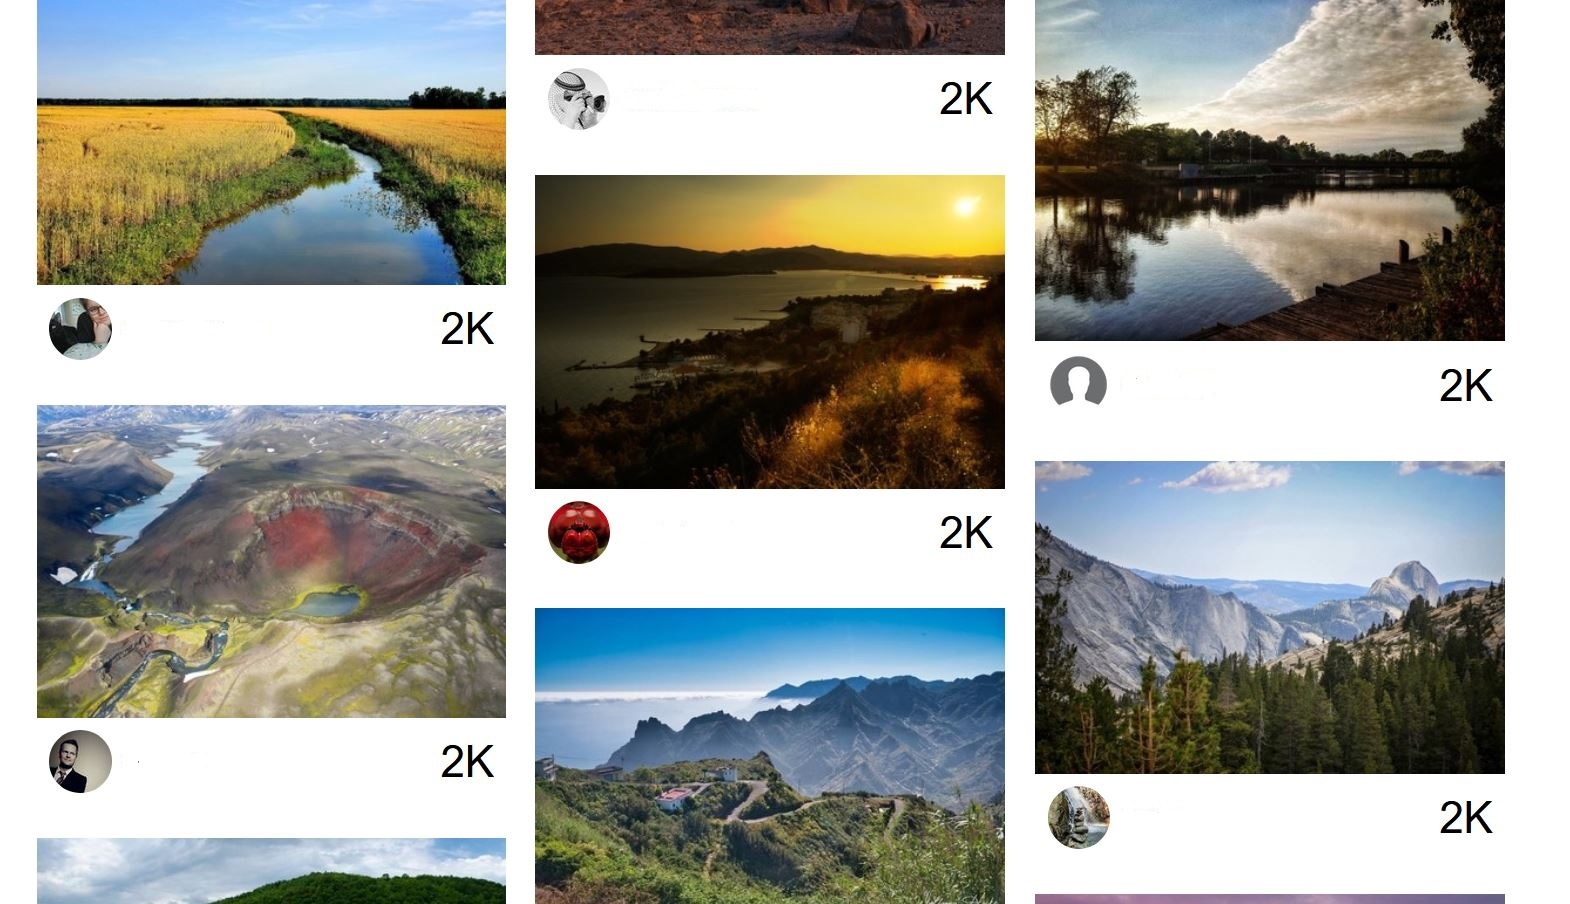

**Removing non Landscape Images**<br/>
Unfortunately some of the photos entered in these contests were clearly not landscape photos. Photos of pets and models would cause weird outliers in our model so we decided to remove as many of these outliers as we could. This process was a manual one that involved looking at all the photos quickly and removing them from the set. After a few hours though, all the incorrect photos were removed.

**Removing Duplicates**<br/>
Because many people enter different contests with the same photo, there was a lot of photos that were in duplicate, triplicate, and more. At first we looked at the photos manually for duplicates, and found many, so we removed them. We then found out the all had the same name, with a (1) (2) etc added to them so we arranged by name in Windows 10 and finding duplicates became much easier. Duplicates were removed for both the award winning and not award winning photos. This process was time consuming, but very necessary. We are sure if could have been done in python, but we were already deep into this on Windows 10, and it was a very quick fix there.

**Removing Duplicate images from the Non-Award Winning images**<br/>
Since we have to webscrape the website from the top down, when we scrape the top 200 - 500 photos for the award winning photos from a competition we get them put into one folder. When we go to get 3000 images for the non-award winning photos from the same contest, we still had to download from the top down so we also got the same 200 - 500 photos in the Non Award Winning Photos folder. Now we have both award winning photos and non-award winning photos in the non-award winning photos directory. Now we will try to remove the good from the bad so we have different photos in each directory, for this we turned to an application called WinMerge. It allowed us to find similarities in one directory to another, and then delete the duplicate files. This worked smoothly and effortlessly.

**WinMerge**<br/>
WinMerge is an Open Source differencing and merging tool for Windows. WinMerge can compare both folders and files, presenting differences in a visual text format that is easy to understand and handle.

WinMerge is highly useful for determining what has changed between project versions, and then merging changes between versions. WinMerge can be used as an external differencing/merging tool or as a standalone application.

In addition, WinMerge has many helpful supporting features that make comparing, synchronising, and merging as easy and useful as possible.

Taken From <a href="https://winmerge.org/?lang=en">Link</a><br/>

**Image Resizing**<br/>
In preparation for running the images through the CNN model we decided to change the aspect ratio of the photos so that they were 256 pixels by 256 pixels. This eliminated the need to change images from landscape to portrait, and ensures all images are the same shape going into the model. While running the process in python we found many images were not working, and returning odd errors. After some investigation and trial and error, we found that some images would not resize. This was probably set into the images metadata by the photographer because they did not want their image manipulated and displayed in an incorrect manner. To solve this problem we used **Image Resizer** in Windows 10 to resize the images into 256 X 256 pixels. The images that did not resize were eliminated. This removed about 200 images per directory. We chose 256 x 256 because that was the final size we wanted the images once everything was done, we had python change them to 64 x 64 pixels for testing purposes and 256 x 256 pixels for the final.

**Directory Labelling**<br/>
When we originally labelled the directories for this project we stored the photos in one directory called "award winning photos" and another directory called "not award winning photos". When originally running through some of the early steps in python we kept getting this weird error about "not". So after some investigation it was determined that the python code was seeing the work 'not' in the directory and assuming it was part of an if else statement. We eventually changed the folders to 'good' and 'bad' and it solved the problem.

# The Next Notebook

The Next Notebook will contain all the information to run the CNN network. We seperated them for convience, and in case of a tragic event with one, the other would remain save.